<div style="text-align: right">INFO 6105 Final Project</div>
<h1><div style="text-align: center">Team 12</div></h1>
<div style="text-align: center">Hao Zhang, Zechuan Miao, Shaodong Wang</div>

<table border="1">
<tr>
<td>Own Code Lines</td>
<td>about 250</td>
</tr>
<tr>
<td>External Code Lines</td>
<td>about 400</td>
</tr>
<tr>
<td>Existing Accurancy</td>
<td>mae 0.86</td>
</tr>
<tr>
<td>Own Accurancy</td>
<td>mae 0.13</td>
</tr>
<tr>
<td>Run Time</td>
<td>avg 10s</td>
</tr>
</table>

# Basic Analysis

In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D

In [83]:
data = pd.read_csv("Video_Games_Sales.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The dataset includes some blank attributes. In the case, we are going to remove some items in the form.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16715 non-null object
Platform           16717 non-null object
Year_of_Release    16448 non-null float64
Genre              16715 non-null object
Publisher          16663 non-null object
NA_Sales           16717 non-null float64
EU_Sales           16717 non-null float64
JP_Sales           16717 non-null float64
Other_Sales        16717 non-null float64
Global_Sales       16717 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [84]:
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data = data[data["Publisher"].notnull()]
data = data[data["Publisher"] != "Unknown"]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2019 - data["Year"]
data = data[data["Age"] > 0]
data["User_Score"] = data["User_Score"].replace("tbd", np.nan).astype(float)
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16316,16316,16316.000000,16316,16316,16316.000000,16316.000000,16316.000000,16316.000000,16316.000000,7952.000000,7952.000000,7433.000000,7433.000000,9851,9719,16316.000000
unique,11319,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1666,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ubisoft,E,NaN
freq,12,2124,NaN,3290,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,3901,NaN
mean,NaN,NaN,2006.467578,NaN,NaN,0.265393,0.146708,0.078899,0.047901,0.539152,69.005533,26.470573,7.129221,162.990448,NaN,NaN,12.532422
std,NaN,NaN,5.881066,NaN,NaN,0.821312,0.508529,0.312147,0.188688,1.564211,13.923637,19.024021,1.496246,564.581929,NaN,NaN,5.881066
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,NaN,NaN,2.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000,NaN,NaN,9.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000,NaN,NaN,12.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,37.000000,8.200000,81.000000,NaN,NaN,16.000000


As for the attribute 'Score', there are plenty of misssing columns. Blow is a function to handle this situation.

In [85]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [86]:
missing_values_table(data)

There are 6 columns that have missing values.


,Missing Values,% of Total Values
User_Score,8883,54.4
User_Count,8883,54.4
Critic_Score,8364,51.3
Critic_Count,8364,51.3
Rating,6597,40.4
Developer,6465,39.6


More than 50% of the data miss Score of User and Critic. I took this very useful function from William Koehrsen. Here an outlier is defined as a value greater than (or lesser than) third quartile (first quartile) plus 3 interquartile ranges (minus 3 interqurtile ranges).

In [87]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [26]:
data, rmvd_global = rm_outliers(data, ["Global"])
data.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,14921.000000,14921.000000,14921.000000,14921.000000,14921.000000,14921.000000,7038.000000,7038.000000,6494.000000,6494.000000,14921.000000
mean,2006.617318,0.130017,0.064796,0.044564,0.021982,0.261639,67.485791,24.076868,7.066015,105.507699,12.382682
std,5.717002,0.179731,0.114488,0.119186,0.044385,0.294783,13.560092,16.766727,1.511802,401.414834,5.717002
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,2.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,59.000000,11.000000,6.300000,9.000000,9.000000
50%,2007.000000,0.060000,0.020000,0.000000,0.010000,0.140000,69.000000,20.000000,7.400000,20.000000,12.000000
75%,2010.000000,0.180000,0.070000,0.030000,0.020000,0.360000,78.000000,33.000000,8.200000,57.000000,16.000000
max,2017.000000,1.320000,1.160000,1.370000,1.180000,1.370000,98.000000,106.000000,9.700000,10665.000000,39.000000


First take a look on the Distribution of year of release

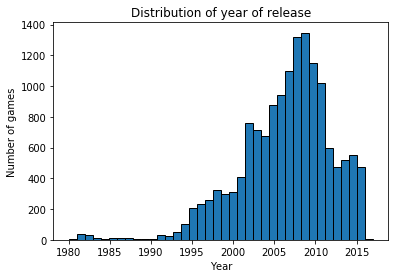

In [27]:
num_years = data["Year"].max() - data["Year"].min() + 1
plt.hist(data["Year"], bins=num_years, edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year")
plt.ylabel("Number of games");

Take a look at the sales.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


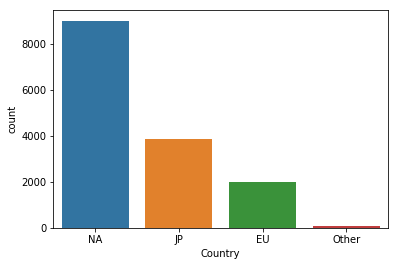

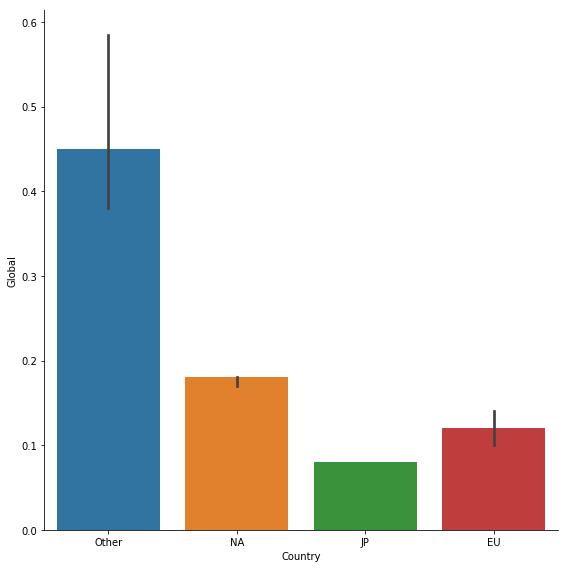

In [28]:
data["Country"] = data[["NA", "EU", "JP", "Other"]].idxmax(1, skipna=True)
sns.countplot(data.Country.dropna(), order = data.Country.value_counts().iloc[:40].index)
sns.factorplot(x="Country", y="Global", data=data, size=8, kind="bar",
               estimator=lambda x: np.median(x))

Next, take a look at the Critic Score and Users Score. In this part, we remove all rows with empty columns. And these two plots of distribution show some difference.

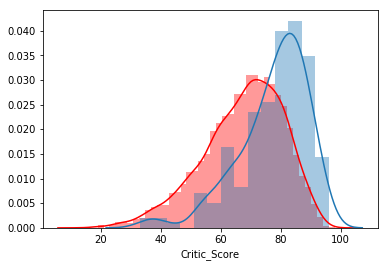

In [29]:
sns.distplot(data.Critic_Score.dropna(), color='red')
sns.distplot(rmvd_global.Critic_Score.dropna())

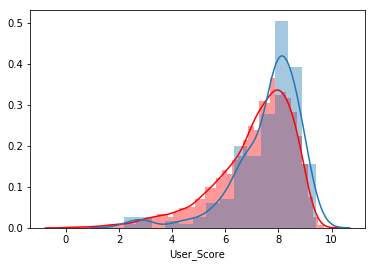

In [30]:
sns.distplot(data.User_Score.dropna(), color='red')
sns.distplot(rmvd_global.User_Score.dropna())

Take a look at platforms with the number of games on them. Platforms with the most released games is DS, and then followed by PS2.

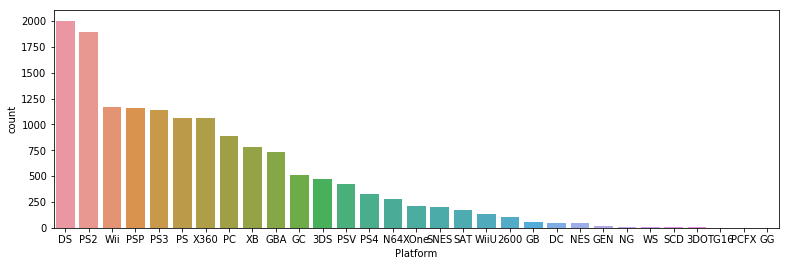

In [38]:
plt.figure(figsize=(13, 4))
#http://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot for odering
sns.countplot(data.Platform.dropna(), order = data.Platform.value_counts().index)

Genre with most released games is action, sports and music are followed.

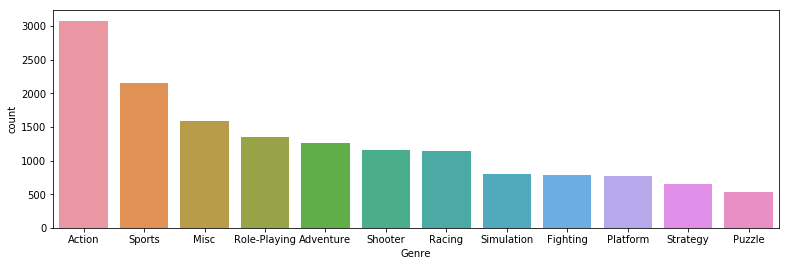

In [15]:
plt.figure(figsize=(13, 4))
sns.countplot(data.Genre.dropna(), order = data.Genre.value_counts().index)

Publisher ordered by the number of their game release. EA is number one haha.

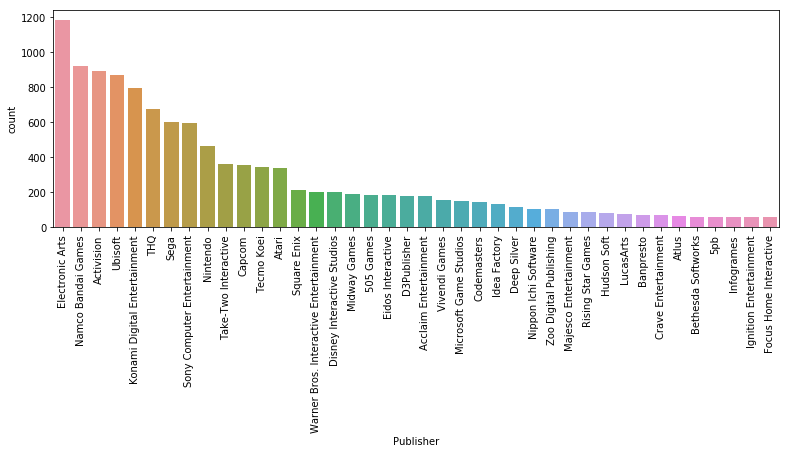

In [16]:
plt.figure(figsize=(13, 4))
sns.countplot(data.Publisher.dropna(), order = data.Publisher.value_counts().iloc[:40].index)
plt.xticks(rotation=90);

Take a look on the sales of different genre.

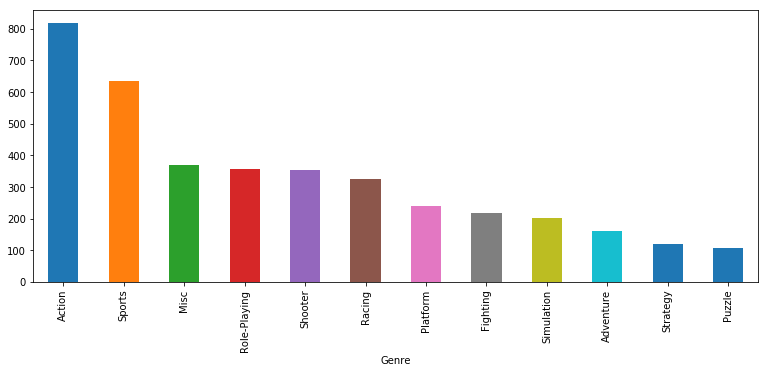

In [63]:
x = data.groupby(['Genre']).sum().copy()
ax = x.Global.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

The best selling platform each year.

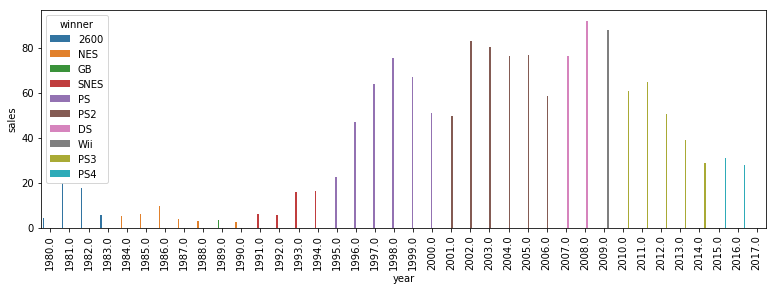

In [45]:
#temp is the sum of all variables for each platform by year
temp = data.groupby(['Year', 'Platform']).sum().reset_index().groupby('Year')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'best_sales_platform':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data.Global > this_year_max_sales:
            this_year_max_sales = platform_data.Global
            current_year_winner = platform_data.Platform
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.barplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner)

#http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
g.set_xticklabels(g.get_xticklabels(), rotation=90)

The top Publisher by global sales.

In [39]:
x = data.groupby(['Publisher']).sum().Global.copy()
x.sort_values(ascending=False, inplace=True)
x.head(10)

Publisher
Electronic Arts                 601.51
Activision                      333.00
Ubisoft                         277.07
Nintendo                        268.89
THQ                             250.29
Sony Computer Entertainment     249.13
Namco Bandai Games              211.09
Konami Digital Entertainment    191.30
Sega                            186.49
Take-Two Interactive            142.28
Name: Global, dtype: float64

Focus on some famous publishers.

In [68]:
top_publishers = ['Electronic Arts', 'Activision','Ubisoft', 'Konami Digital Entertainment',
                  'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive',
                  'Microsoft Game Studios','Bethesda Softworks']
publisher_focus = data[data['Publisher'].isin(top_publishers)]

Find out what is the most welcomed genre in these publishers.

In [45]:
x = publisher_focus.groupby(['Publisher', 'Genre']).count().copy()
x.unstack().Name.idxmax(axis=1)

Publisher
Activision                       Action
Bethesda Softworks              Shooter
Electronic Arts                  Sports
Konami Digital Entertainment     Sports
Microsoft Game Studios             Misc
Nintendo                           Misc
Sega                             Sports
Sony Computer Entertainment        Misc
THQ                              Action
Take-Two Interactive             Sports
Ubisoft                          Action
dtype: object

In [46]:
x = publisher_focus.groupby(['Publisher', 'Genre']).sum().copy()
x.unstack().Global.idxmax(axis=1)

Publisher
Activision                            Action
Bethesda Softworks                   Shooter
Electronic Arts                       Sports
Konami Digital Entertainment          Sports
Microsoft Game Studios               Shooter
Nintendo                        Role-Playing
Sega                                  Sports
Sony Computer Entertainment             Misc
THQ                                   Action
Take-Two Interactive                  Sports
Ubisoft                               Action
dtype: object

Regional sales.

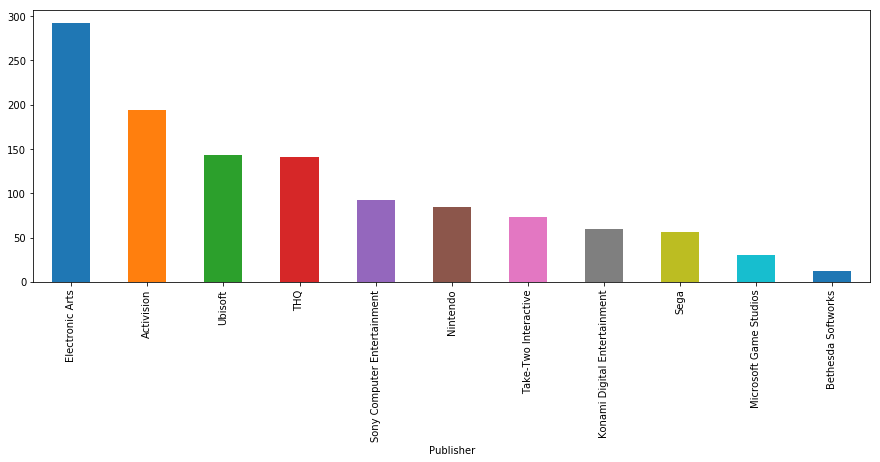

In [69]:
ax = publisher_focus.groupby('Publisher').sum().unstack().NA.sort_values(ascending=False).plot(kind='bar',
                                                                                             figsize=(15, 5));

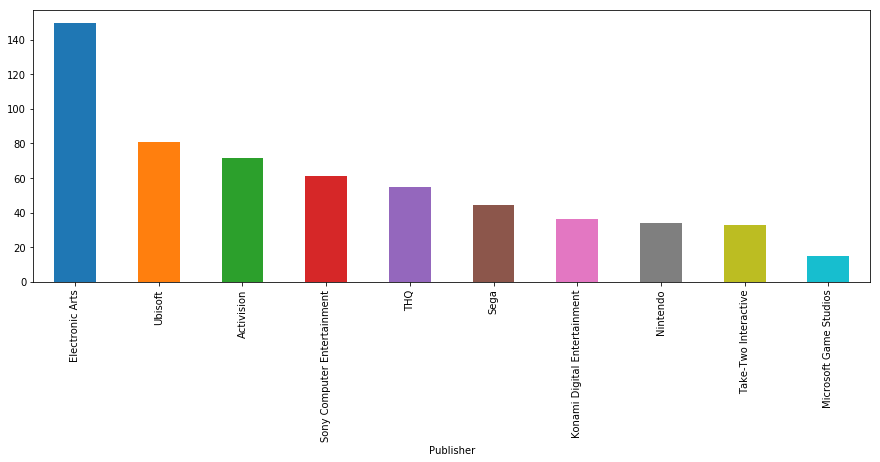

In [70]:
publisher_focus.groupby('Publisher').sum().unstack().EU.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15, 5))

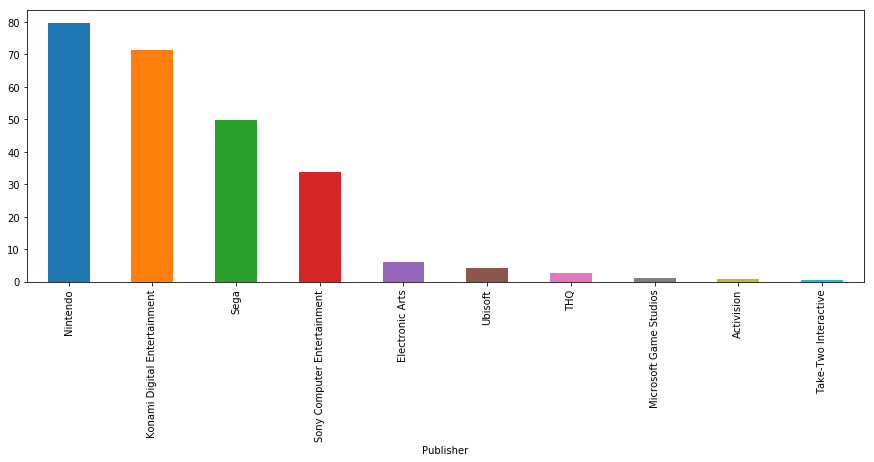

In [71]:
publisher_focus.groupby('Publisher').sum().unstack().JP.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15, 5))

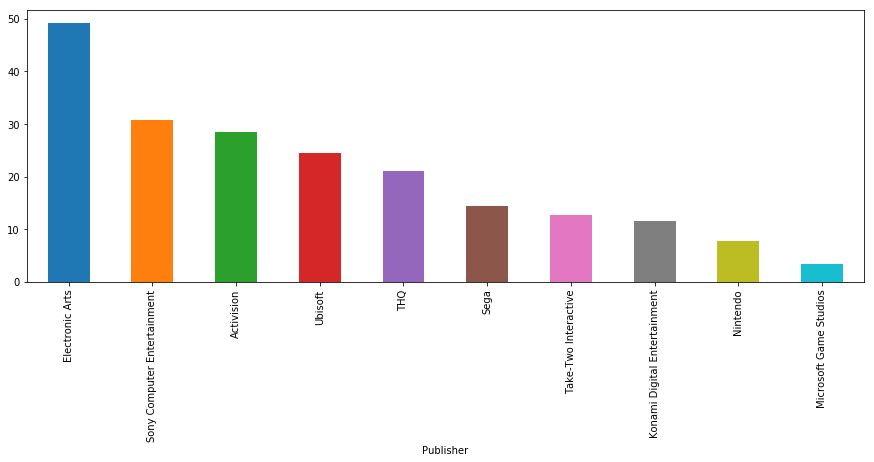

In [72]:
publisher_focus.groupby('Publisher').sum().unstack().Other.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15, 5))

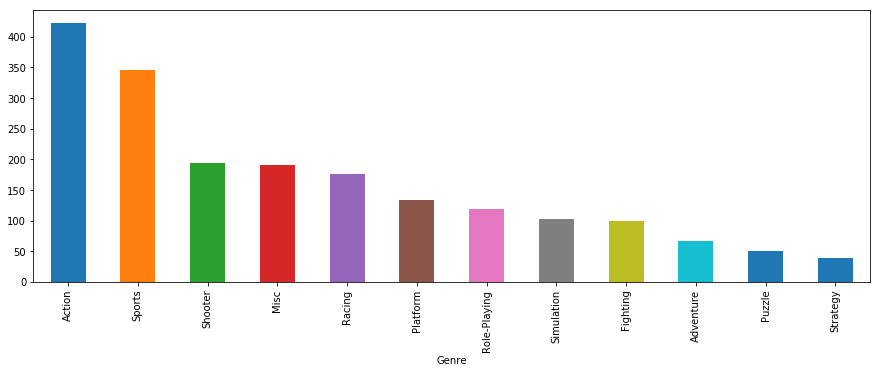

In [74]:
data.groupby('Genre').sum().unstack().NA.sort_values(ascending=False).plot(kind='bar',figsize=(15, 5))

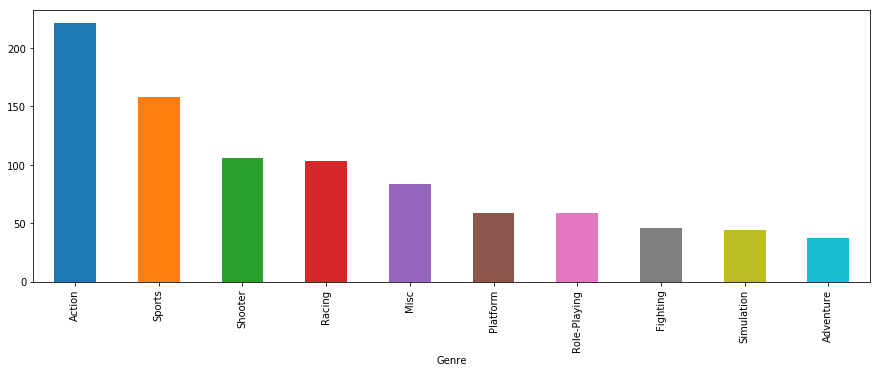

In [59]:
data.groupby('Genre').sum().unstack().EU.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15, 5))

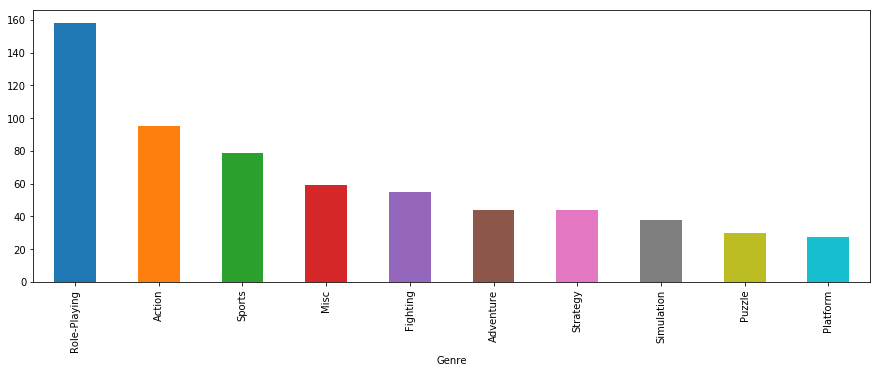

In [60]:
data.groupby('Genre').sum().unstack().JP.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15, 5));

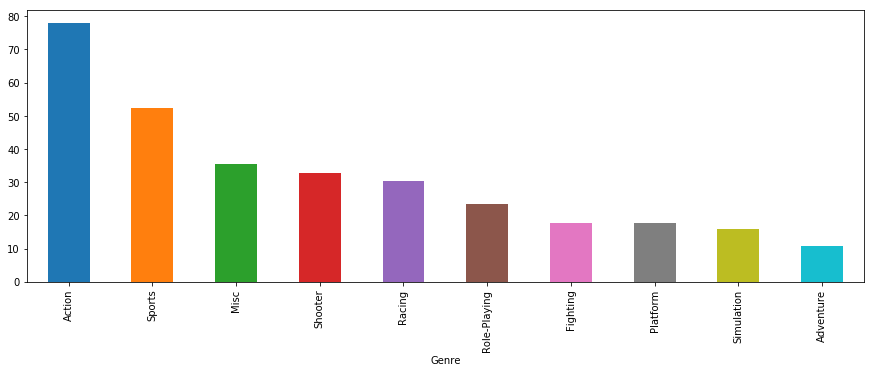

In [61]:
data.groupby('Genre').sum().unstack().Other.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15, 5));

### Correlation

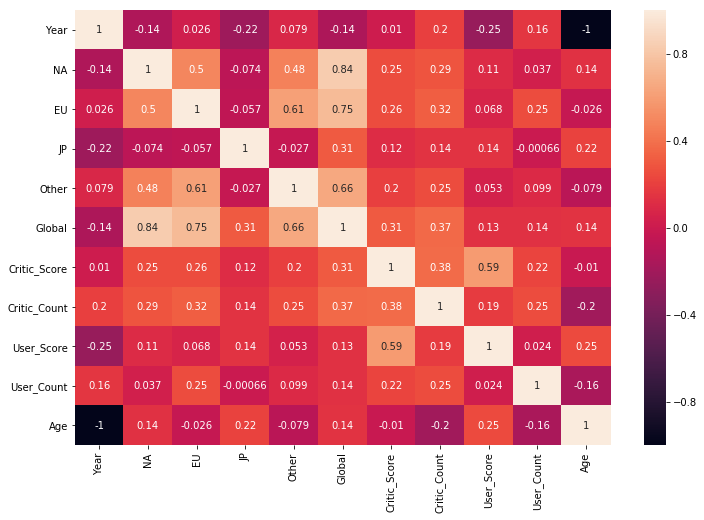

In [17]:
plt.figure(figsize=(12, 8))

vg_corr = data.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

# Prediction Part

In [3]:

import numpy as np 
import pandas as pd

In [58]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

# Set default font size and facecolor
plt.rcParams["font.size"] = 24
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
figsize(15, 12)

# Seaborn for visualization
import seaborn as sns

In [4]:
data = pd.read_csv("Video_Games_Sales.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Some Info about the data

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


 Converting Year to Age to narrow the scope of our data 

In [5]:
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2019 - data["Year"]
data = data[data["Age"] > 0]
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16447,16447,16447.000000,16447,16415,16447.000000,16447.000000,16447.000000,16447.000000,16447.000000,7983.000000,7983.000000,9839,7463.000000,9906,9768,16447.000000
unique,11428,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2376,NaN,200,3921,NaN
mean,NaN,NaN,2006.488174,NaN,NaN,0.263964,0.145904,0.078476,0.047585,0.536185,68.994363,26.441313,NaN,163.015141,NaN,NaN,12.511826
std,NaN,NaN,5.876705,NaN,NaN,0.818311,0.506674,0.311073,0.187989,1.558506,13.920060,19.008136,NaN,563.863327,NaN,NaN,5.876705
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN,2.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN,9.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,NaN,24.000000,NaN,NaN,12.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN,16.000000


Handle the missing value. (Use the value without Nan to build our first model)

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
User_Count,8984,54.6
Critic_Score,8464,51.5
Critic_Count,8464,51.5
Rating,6679,40.6
User_Score,6608,40.2
Developer,6541,39.8
Publisher,32,0.2


A function to filter the outliers. Here an outlier is defined as a value greater than (or lesser than) third quartile (first quartile) plus 1.5 interquartile ranges (minus 1.5 interqurtile ranges).

In [8]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 1.5 * iqr)) |
                    (df_out[key] >= (third_quartile + 1.5 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 1.5 * iqr)) &
                    (df_out[key] < (third_quartile + 1.5 * iqr))]
    return df_out, removed

In [9]:
data, rmvd_global = rm_outliers(data, ["Global"])
data.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Count,Age
count,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,6761.000000,6761.000000,6216.000000,14576.000000
mean,2006.717344,0.114544,0.055622,0.040072,0.018764,0.229291,67.081941,23.434699,99.237291,12.282656
std,5.628703,0.151943,0.095432,0.102225,0.034909,0.241250,13.531186,16.218148,384.849075,5.628703
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000,2.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.050000,59.000000,11.000000,9.000000,9.000000
50%,2008.000000,0.060000,0.020000,0.000000,0.010000,0.140000,69.000000,19.000000,19.000000,11.000000
75%,2010.000000,0.160000,0.070000,0.030000,0.020000,0.320000,77.000000,32.000000,53.000000,16.000000
max,2017.000000,1.030000,0.980000,1.050000,0.740000,1.080000,98.000000,106.000000,10665.000000,39.000000


As mentioned before, this step is to drop the NaN value in score columns. (Almost 50% of all scores, it is a big part of our data)

In [65]:
data["Has_Score"] = data["User_Score"].notnull() & data["Critic_Score"].notnull()
rmvd_global["Has_Score"] = rmvd_global["User_Score"].notnull() & rmvd_global["Critic_Score"].notnull()

In [66]:
scored = data.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Count,Age
count,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.00000,6661.000000,5627.00000,6661.000000
mean,2007.103138,0.156910,0.078661,0.020002,0.026927,0.282843,67.07101,23.527699,106.07695,11.896862
std,4.102152,0.161151,0.107225,0.067227,0.037810,0.262001,13.53264,16.251441,402.59586,4.102152
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.00000,3.000000,4.00000,3.000000
25%,2004.000000,0.040000,0.010000,0.000000,0.000000,0.080000,59.00000,11.000000,9.00000,9.000000
50%,2007.000000,0.100000,0.030000,0.000000,0.010000,0.190000,69.00000,20.000000,21.00000,12.000000
75%,2010.000000,0.220000,0.110000,0.000000,0.030000,0.420000,77.00000,33.000000,57.00000,15.000000
max,2016.000000,1.030000,0.970000,0.860000,0.540000,1.080000,98.00000,106.000000,10665.00000,34.000000


Remove outliers in user_count(buyer_count)

In [67]:
scored, rmvd_user_count = rm_outliers(scored, ["User_Count"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Count,Age
count,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000
mean,2006.931921,0.165572,0.075315,0.021948,0.027643,0.290742,66.794735,23.417112,27.272522,12.068079
std,3.948456,0.163482,0.100980,0.070452,0.038179,0.256232,13.336815,14.494287,26.911949,3.948456
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,17.000000,3.000000,4.000000,3.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,0.090000,59.000000,12.000000,8.000000,10.000000
50%,2007.000000,0.110000,0.030000,0.000000,0.010000,0.200000,69.000000,21.000000,17.000000,12.000000
75%,2009.000000,0.230000,0.100000,0.000000,0.040000,0.430000,77.000000,32.000000,35.000000,15.000000
max,2016.000000,0.970000,0.900000,0.740000,0.540000,1.080000,94.000000,84.000000,128.000000,34.000000


Let's see how many different platforms in data

In [68]:
scored["Platform"].unique(), scored["Genre"].unique(), scored["Rating"].unique()

(array(['PS2', 'PSP', 'PS3', 'GBA', 'GC', 'X360', 'DS', 'Wii', 'XB', 'PS',
        'XOne', '3DS', 'PC', 'PS4', 'WiiU', 'PSV', 'DC'], dtype=object),
 array(['Racing', 'Misc', 'Fighting', 'Shooter', 'Action', 'Sports',
        'Simulation', 'Adventure', 'Platform', 'Role-Playing', 'Strategy',
        'Puzzle'], dtype=object),
 array(['E', 'E10+', 'T', 'M', 'RP'], dtype=object))

Thats too many different types in platforms. 

This time we try to remove the publishers and developers. They don't seem to be important.

 Let's look at the highest and lowest correlations with the global sales column

In [32]:
correlations.head(5)

Platform_13   -0.206510
Genre_11      -0.106123
Genre_8       -0.082663
Platform_16   -0.071180
Rating_4      -0.070215
Name: Global, dtype: float64

In [33]:
correlations.tail(5)

User_Score      0.128121
User_Count      0.220822
Critic_Score    0.250048
Critic_Count    0.261554
Global          1.000000
Name: Global, dtype: float64

In [35]:
features.shape

(4862, 43)

We use mean absolute error to evluate our model.

In [57]:
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

divide data into train set and test set.

In [25]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, basic_target, 
                                                                            test_size=0.2,
                                                                            random_state=42)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3889, 42)
(973, 42)
(3889,)
(973,)


baseline_guess

In [144]:
baseline_guess = np.median(target_train)
basic_baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

Baseline guess for global sales is: 0.12
Baseline Performance on the test set: MAE = 0.7498


In [145]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

lets define a function to simplify our test and evaluate.

In [146]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [147]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))


Linear Regression Performance on the test set: MAE = 0.7836


In [148]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

Support Vector Machine Regression Performance on the test set: MAE = 0.7892


In [149]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

C:\MyField\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 0.8889


In [150]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(gradient_boosting_mae))

Gradient Boosting Regression Performance on the test set: MAE = 0.7971


In [151]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.8533


In [152]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.7836


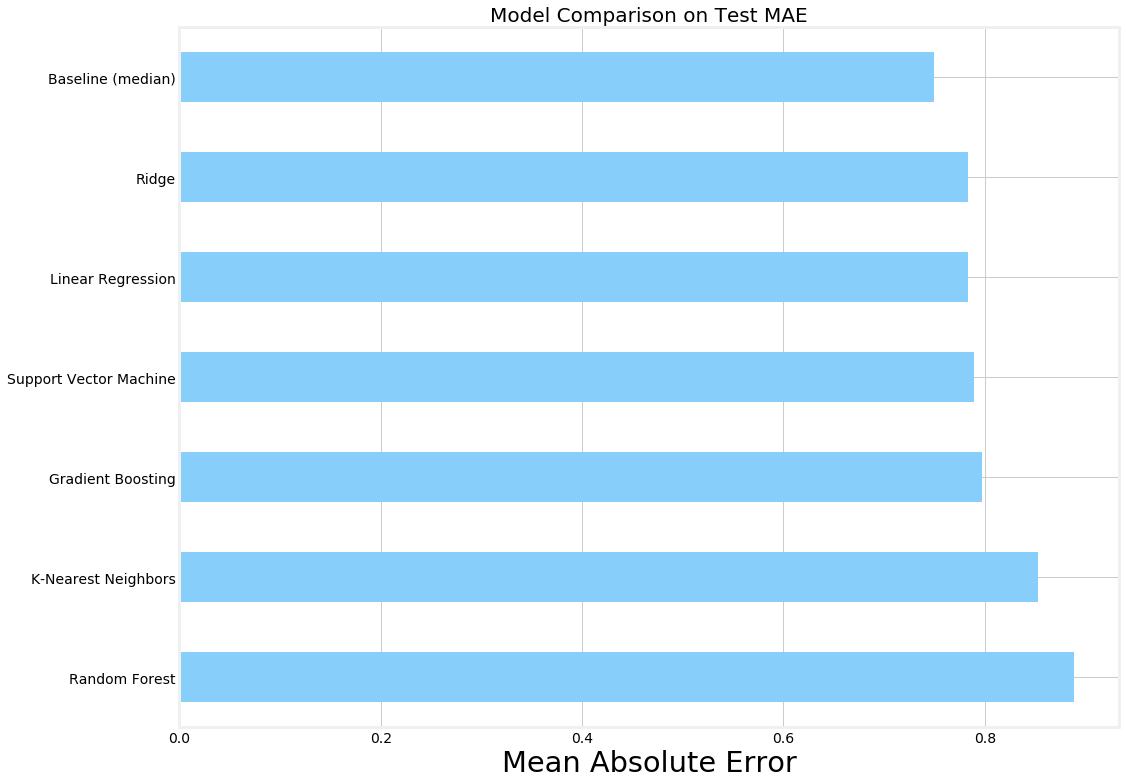

In [153]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Baseline (median)", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, basic_baseline_mae, ridge_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

OKay... The baseline may be the best model in this test. So what can be improved？
The first thing we thought about was that we could improve our feature.

This is a donut chart of platforms

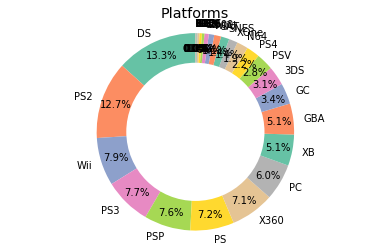

In [51]:
donut_chart(data["Platform"])
plt.title("Platforms")
plt.axis("equal");

Too many developers.... drop them at this time

In [149]:
data["Developer"].unique().shape

(1619,)

In [52]:
data["Platform"].unique()

array(['Wii', 'PS2', 'PS3', 'PS', 'N64', 'GBA', 'DS', 'GC', 'X360', 'GB',
       'PC', '3DS', 'PSP', 'XB', 'NES', 'PS4', 'GEN', '2600', 'SNES',
       'XOne', 'WiiU', 'PSV', 'SCD', 'DC', 'SAT', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Reclassify the platforms

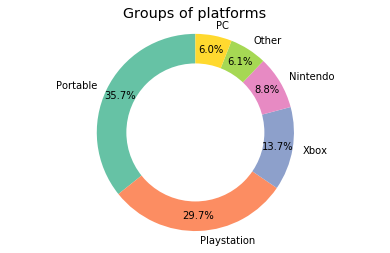

In [55]:
data["Grouped_Platform"] = data["Platform"].apply(lambda x: get_group_label(x, groups=platforms))
donut_chart(data["Grouped_Platform"])
plt.title("Groups of platforms")
plt.axis("equal");

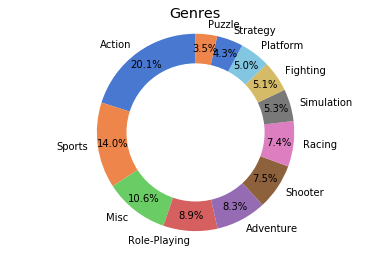

In [56]:
donut_chart(data["Genre"], palette="muted")
plt.title("Genres")
plt.axis("equal");

In [58]:
scored[scored["Grouped_Platform"]=="Other"]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age,Has_Score,Country,Grouped_Platform
1712,Shenmue,DC,1999,Adventure,Sega,0.52,0.24,0.38,0.04,1.18,88.0,9.0,9.4,201.0,Sega AM2,T,20,True,NA,Other
1877,NFL 2K1,DC,2000,Sports,Sega,1.02,0.05,0.00,0.02,1.09,97.0,22.0,6.0,47.0,Visual Concepts,E,19,True,NA,Other
3815,Seaman,DC,1999,Simulation,Sega,0.00,0.00,0.52,0.00,0.52,82.0,24.0,8.4,16.0,Vivarium,T,20,True,JP,Other
5350,SoulCalibur,DC,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34,98.0,24.0,8.8,200.0,Namco,T,20,True,JP,Other
7231,Capcom vs. SNK,DC,2000,Fighting,Virgin Interactive,0.00,0.00,0.22,0.00,0.22,80.0,17.0,9.0,24.0,Capcom,T,19,True,JP,Other
7521,Phantasy Star Online,DC,2000,Role-Playing,Sega,0.00,0.00,0.20,0.00,0.20,89.0,21.0,9.1,33.0,Sonic Team,T,19,True,JP,Other
7643,Grandia II,DC,2000,Role-Playing,Ubisoft,0.00,0.00,0.20,0.00,0.20,90.0,17.0,8.8,57.0,Game Arts,T,19,True,JP,Other
7978,Phantasy Star Online Ver. 2,DC,2001,Role-Playing,Sega,0.00,0.00,0.19,0.00,0.19,80.0,10.0,8.9,18.0,Sonic Team,T,18,True,JP,Other
8905,Shenmue II,DC,2001,Adventure,Sega,0.00,0.00,0.15,0.00,0.15,88.0,9.0,9.4,201.0,Sega AM2,T,18,True,JP,Other
9559,Sega GT,DC,2000,Racing,Sega,0.00,0.00,0.13,0.00,0.13,84.0,25.0,7.7,11.0,TOSE,E,19,True,JP,Other


Use xgboost model to improve the result

In [69]:
import xgboost as xgb

In [77]:
def donut_chart(column, palette="Set2"):
    values = column.value_counts().values
    labels = column.value_counts().index
    plt.pie(values, colors=sns.color_palette(palette), 
            labels=labels, autopct="%1.1f%%", 
            startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

In [11]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [12]:
def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

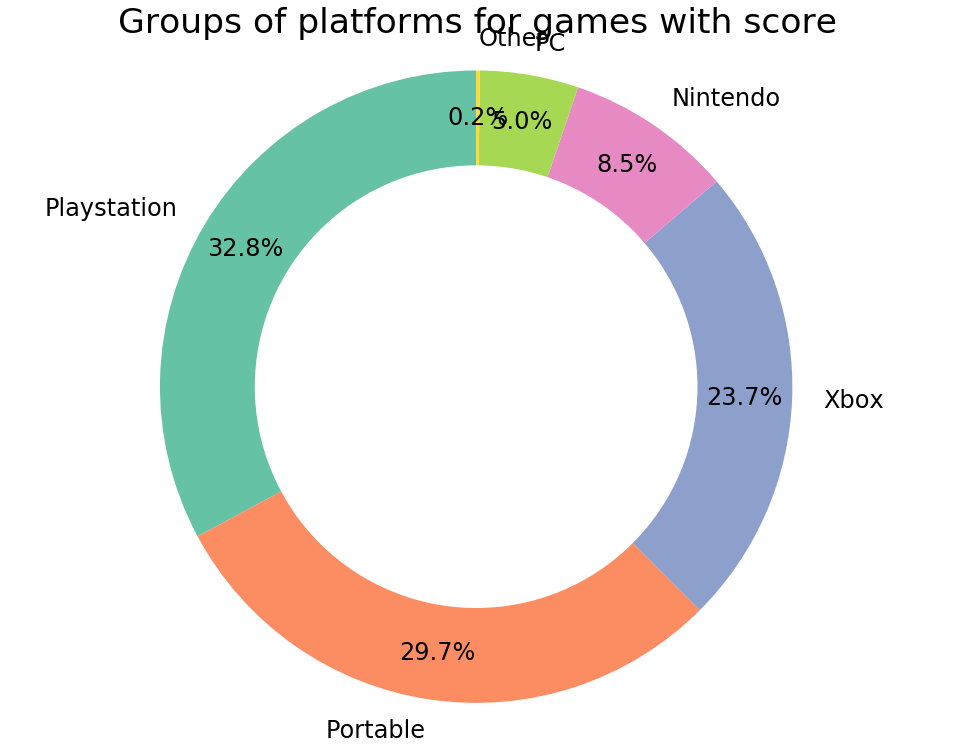

In [80]:
scored["Grouped_Platform"] = scored["Platform"].apply(lambda x: get_group_label(x, platforms))
donut_chart(scored["Grouped_Platform"])
plt.title("Groups of platforms for games with score")
plt.axis("equal");

In [81]:
numeric_subset = scored.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])
categorical_subset = scored[["Grouped_Platform", "Genre", "Rating"]]

Use one hot encoder for genre, rating and platform

In [82]:
import category_encoders as ce
# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

In [86]:
# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features_grouped = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features_grouped.corr()["Global"].dropna().sort_values()

In [84]:
correlations

Grouped_Platform_5   -0.206510
Genre_11             -0.106123
Genre_8              -0.082663
Rating_4             -0.070215
Grouped_Platform_2   -0.059689
Genre_10             -0.050536
Genre_12             -0.047331
Rating_3             -0.034057
Grouped_Platform_3   -0.019429
Grouped_Platform_6   -0.017680
Rating_5             -0.014597
Genre_4              -0.011834
Genre_5              -0.011192
Genre_9               0.010414
Rating_2              0.010888
Genre_7               0.013888
Genre_1               0.013888
Genre_3               0.035128
Genre_2               0.038068
Age                   0.041134
Grouped_Platform_4    0.072178
Rating_1              0.080102
Genre_6               0.113329
Grouped_Platform_1    0.130512
User_Count            0.220822
Critic_Score          0.250048
Critic_Count          0.261554
Global                1.000000
Name: Global, dtype: float64

xgb fit function
the score is mean_squared_error

In [116]:
def modelfit(alg,features_train, features_test, target_train, target_test,
             useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain =xgb.DMatrix(features_train,label=target_train)
        xgtest = xgb.DMatrix(features_test)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds,show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])#cvresult.shape[0]和alg.get_params()['n_estimators']值一样

    #Fit the algorithm on the data
    alg.fit(features_train, target_train,eval_metric='rmse')
    #Predict training set:
    dtrain_predictions = alg.predict(features_train)
    #Print model report:
    print(" Score (Train): %f" % metrics.mean_squared_error(target_train.values, dtrain_predictions))
    #Predict on testing data:
    dtest_predictions = alg.predict(features_test)
    print("Score (Test): %f" % metrics.mean_squared_error(target_test.values, dtest_predictions))
    plt.bar(basic_features_xgb.columns, alg.feature_importances_, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='one', lw=1)
    plt.xlabel("feature") 
    plt.ylabel("importance")
    plt.xticks(rotation=90);
    plt.title('Feature Importances')
   # print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
   # print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)


Build test set and train set

In [89]:
basic_target_xgb = pd.Series(features["Global"])
basic_features_xgb = features.drop(columns="Global")

In [90]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(basic_features_xgb, basic_target_xgb, 
                                                                            test_size=0.2,
                                                                            random_state=42)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3889, 30)
(973, 30)
(3889,)
(973,)


In [91]:
from xgboost.sklearn import XGBRegressor
from sklearn import metrics   #Additional     scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

 Score (Train): 0.031101
Score (Test): 0.048137


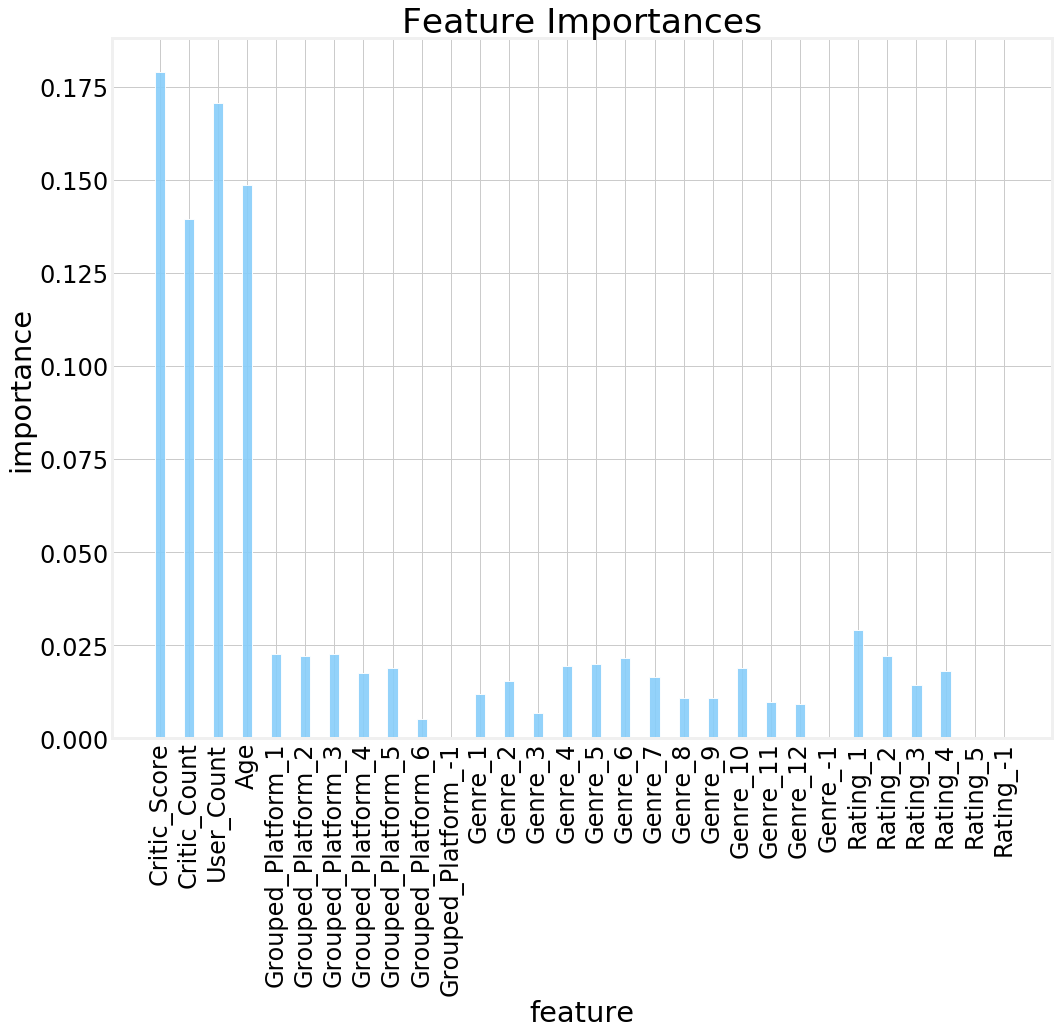

In [118]:
xgb1 = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 1.1,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
t = modelfit(xgb1, features_train, features_test, target_train, target_test)

Adjust parameter to get better performence

max_depth and min_child_weight
to prevent overfitting, don't use too large max_depth 

In [119]:
param_test1 = {
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 1.1,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(features_train,target_train)
means = gsearch1.cv_results_['mean_test_score']
params = gsearch1.cv_results_['params']
gsearch1.best_params_

In [120]:
gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 5}

Narrow search scope for better parameter

In [121]:
param_test2 = {
    'max_depth':[4,5,6],
    'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 1.1,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(features_train,target_train)
gsearch2.best_params_

{'max_depth': 5, 'min_child_weight': 6}

In [122]:
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 6,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                    param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(features_train,target_train)
gsearch3.best_params_

{'gamma': 0.0}

gamma

In [123]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.0,
                    min_child_weight= 6,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(features_train,target_train)
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'colsample_bytree': 0.6, 'subsample': 0.9}
-0.043647005884568976


Subsample and colsample_bytree

In [126]:
param_test5 = {
 'subsample':[i/100.0 for i in range(40,70,5)],
 'colsample_bytree':[i/100.0 for i in range(70,100,5)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.0,
                    min_child_weight= 6,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch5.fit(features_train,target_train)
print(gsearch5.best_params_)
print(gsearch5.best_score_)

{'colsample_bytree': 0.85, 'subsample': 0.45}
-0.04404248392884586


 Score (Train): 0.031073
Score (Test): 0.048693


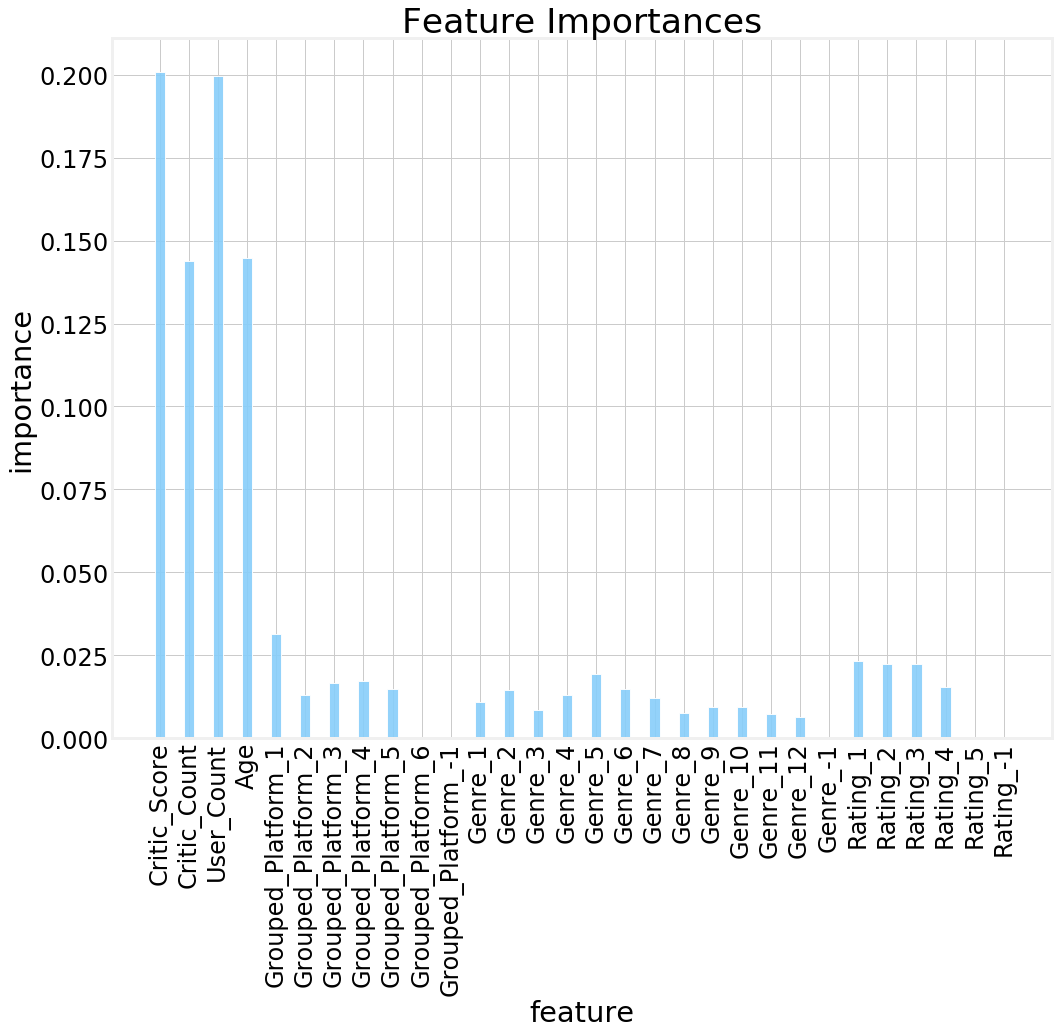

In [127]:
xgb2 = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.0,
                    min_child_weight= 6,
                    max_depth= 5,
                    subsample= 0.45,
                    colsample_bytree= 0.85,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
modelfit(xgb2, features_train, features_test, target_train, target_test)

the importance has some change after adjusted parameters. User_conut and Critic_score rise

Some test for prediction

In [79]:
def modelfit_2(alg,features_train, features_test, target_train, target_test,
             useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain =xgb.DMatrix(features_train,label=target_train)
        xgtest = xgb.DMatrix(features_test)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds,show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])#cvresult.shape[0]和alg.get_params()['n_estimators']值一样

    #Fit the algorithm on the data
    alg.fit(features_train, target_train,eval_metric='rmse')
    #Predict training set:
    dtrain_predictions = alg.predict(features_train)
    #Print model report:
    print(" Score (Train): %f" % metrics.mean_squared_error(target_train.values, dtrain_predictions))
    #Predict on testing data:
    dtest_predictions = alg.predict(features_test)
    print("Score (Test): %f" % metrics.mean_squared_error(target_test.values, dtest_predictions))
    return alg

In [129]:
xgb2 = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.0,
                    min_child_weight= 6,
                    max_depth= 5,
                    subsample= 0.45,
                    colsample_bytree= 0.85,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
pred_alg = modelfit_2(xgb2, features_train, features_test, target_train, target_test)

 Score (Train): 0.031073
Score (Test): 0.048693


In [130]:
basic_final_pred = pred_alg.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))

Final model performance on the test set: MAE = 0.1646.


You can see this model is better than before

draw the kdeplot

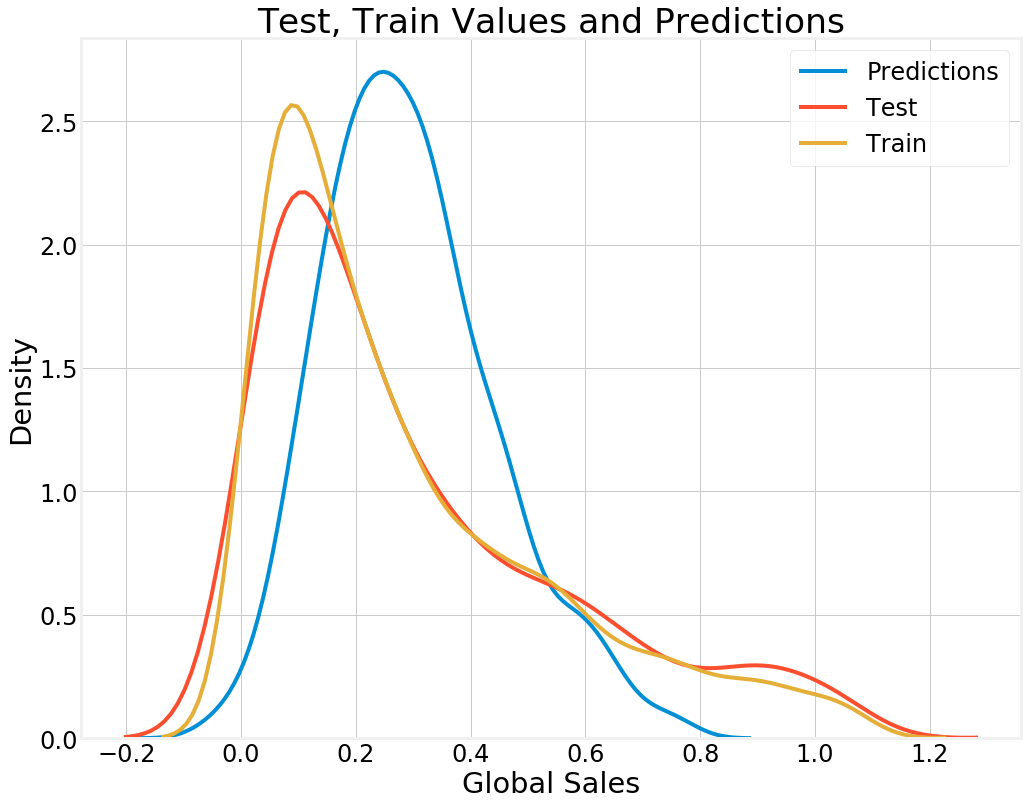

In [131]:
sns.kdeplot(basic_final_pred, label = "Predictions")
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

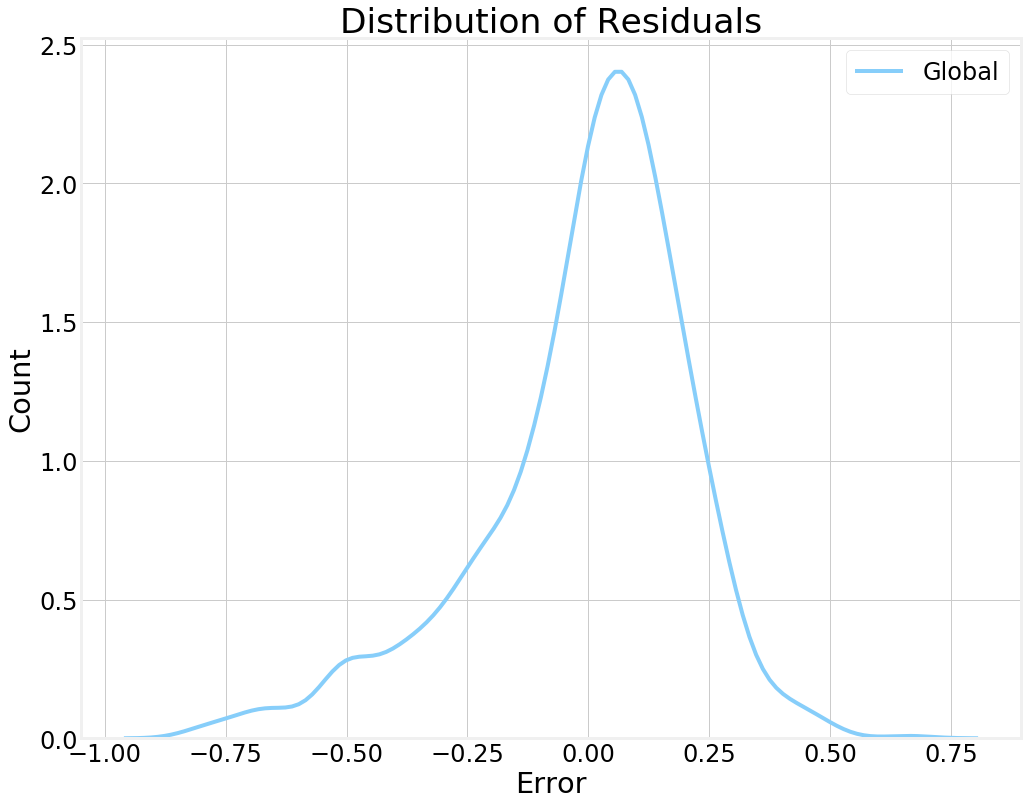

In [132]:
basic_residuals = basic_final_pred - target_test

sns.kdeplot(basic_residuals, color = "lightskyblue")
plt.xlabel("Error"); plt.ylabel("Count")
plt.title("Distribution of Residuals");

In [59]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [64]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train.dropna, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    #sns.kdeplot(model_pred, label = "Predictions")
    #sns.kdeplot(target_test, label = "Test")
    #sns.kdeplot(target_train, label = "Train")

    #plt.xlabel("Global Sales"); plt.ylabel("Density");
    #plt.title("Test, Train Values and Predictions");
    # Return the performance metric
    return model_mae

In [138]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

C:\MyField\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 0.1727


In [145]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))

Linear Regression Performance on the test set: MAE = 0.1748


In [139]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

Support Vector Machine Regression Performance on the test set: MAE = 0.2149


In [140]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.1905


In [141]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.1749


In [142]:
baseline_guess = np.median(target_train)
basic_baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

Baseline guess for global sales is: 0.20
Baseline Performance on the test set: MAE = 0.2028


In [143]:
basic_final_pred = pred_alg.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))

Final model performance on the test set: MAE = 0.1646.


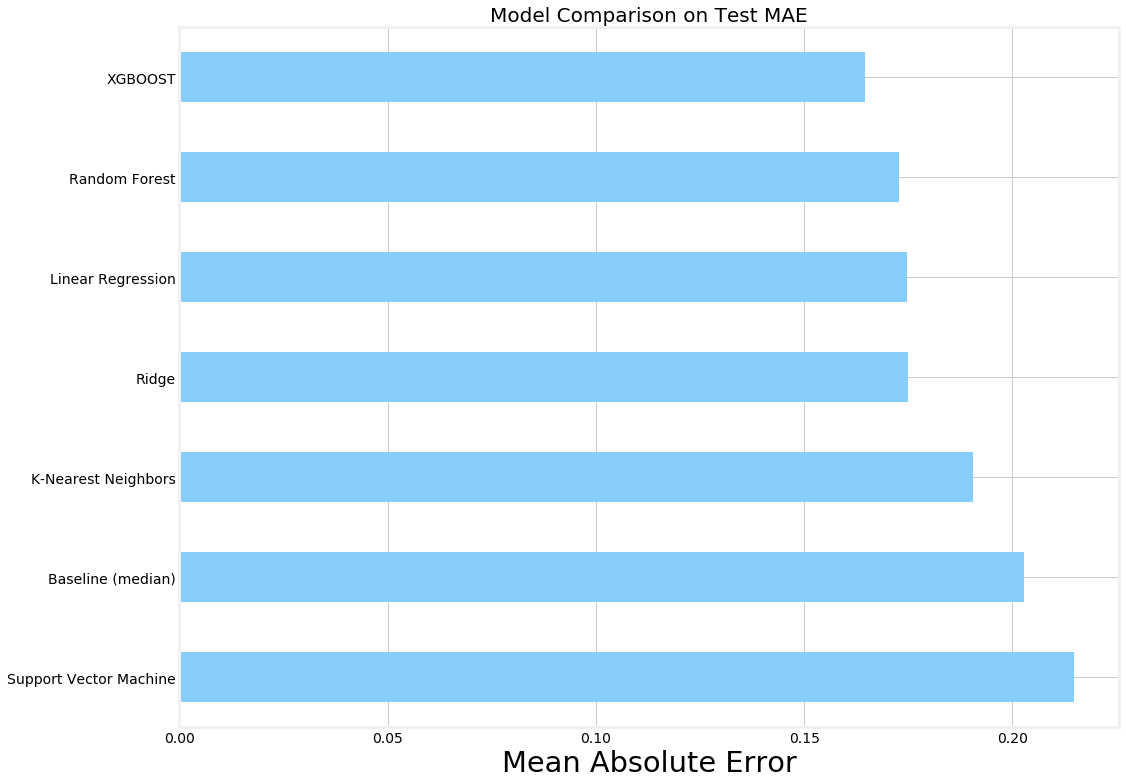

In [146]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "XGBOOST",
                                            "K-Nearest Neighbors", "Baseline (median)", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         basic_final_mae, knn_mae, basic_baseline_mae, ridge_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

# Model II.<br>
This time we will train the data with publisher and developer. 

In [16]:
data = pd.read_csv("Video_Games_Sales.csv")
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2019 - data["Year"]
data = data[data["Age"] > 0]
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16447,16447,16447.000000,16447,16415,16447.000000,16447.000000,16447.000000,16447.000000,16447.000000,7983.000000,7983.000000,9839,7463.000000,9906,9768,16447.000000
unique,11428,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2376,NaN,200,3921,NaN
mean,NaN,NaN,2006.488174,NaN,NaN,0.263964,0.145904,0.078476,0.047585,0.536185,68.994363,26.441313,NaN,163.015141,NaN,NaN,12.511826
std,NaN,NaN,5.876705,NaN,NaN,0.818311,0.506674,0.311073,0.187989,1.558506,13.920060,19.008136,NaN,563.863327,NaN,NaN,5.876705
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN,2.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN,9.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,NaN,24.000000,NaN,NaN,12.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN,16.000000


In [17]:
data, rmvd_global = rm_outliers(data, ["Global"])
data.drop(columns=["NA", "EU", "JP", "Other", "Year"])

,Name,Platform,Genre,Publisher,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
1892,NASCAR Thunder 2004,PS2,Racing,Electronic Arts,1.08,88.0,15.0,8.9,77.0,EA Tiburon,E,16
1893,SpongeBob SquarePants: Revenge of the Flying D...,PS2,Platform,THQ,1.08,NaN,NaN,6.6,41.0,Big Sky Software,E,17
1894,Imagine: Babysitters,DS,Simulation,Ubisoft,1.08,NaN,NaN,tbd,NaN,Visual Impact,E,11
1895,Namco Museum Battle Collection,PSP,Misc,Sony Computer Entertainment,1.08,73.0,28.0,7.2,9.0,TOSE,E10+,14
1896,Fisherman's Bass Club,PS2,Sports,Agetec,1.08,NaN,NaN,tbd,NaN,Vingt-et-un Systems,E,17
1897,Empire: Total War,PC,Strategy,Sega,1.08,90.0,62.0,6.9,2981.0,Creative Assembly,T,10
1898,Virtua Fighter 5,PS3,Fighting,Sega,1.08,85.0,47.0,7.4,67.0,Sega AM2,T,12
1899,Dante's Inferno,PS3,Action,Electronic Arts,1.08,75.0,69.0,7.5,265.0,Visceral Games,M,9
1900,Toy Story 3: The Video Game,PS3,Action,Disney Interactive Studios,1.08,NaN,NaN,NaN,NaN,NaN,NaN,9
1901,Joust,2600,Platform,Atari,1.08,NaN,NaN,NaN,NaN,NaN,NaN,37


To encode the publisher and developer, we need to use LabelEncoder rather than one hot encoder

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Developer_pre= data["Developer"].fillna("0")
Publisher_pre = data["Publisher"].fillna("0")
Developer_le = le.fit_transform(Developer_pre)
Publisher_le = le.fit_transform(Publisher_pre)

In [28]:
import category_encoders as ce

# Select the categorical column
categorical_subset = data[["Platform", "Genre", "Rating"]]

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

In [30]:
numeric_subset = data.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])
categorical_subset["Developer"]= Developer_le
categorical_subset["Publisher"]=Publisher_le
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

In [36]:
basic_target = pd.Series(features["Global"])
basic_features = features.drop(columns="Global")

In [37]:
# use PCA or not
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.2,
                                                                            random_state=42)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(11660, 60)
(2916, 60)
(11660,)
(2916,)


In [45]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from sklearn import metrics   #Additional     scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

In [48]:
def modelfit(alg,features_train, features_test, target_train, target_test,
             useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain =xgb.DMatrix(features_train,label=target_train)
        xgtest = xgb.DMatrix(features_test)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds,show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])#cvresult.shape[0]和alg.get_params()['n_estimators']值一样

    #Fit the algorithm on the data
    alg.fit(features_train, target_train,eval_metric='rmse')
    #Predict training set:
    dtrain_predictions = alg.predict(features_train)
    #Print model report:
    print(" Score (Train): %f" % metrics.mean_squared_error(target_train.values, dtrain_predictions))
    #Predict on testing data:
    dtest_predictions = alg.predict(features_test)
    print("Score (Test): %f" % metrics.mean_squared_error(target_test.values, dtest_predictions))
    plt.bar(features_train.columns, alg.feature_importances_, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='one', lw=1)
    plt.xlabel("feature") 
    plt.ylabel("importance")
    plt.xticks(rotation=90);
    plt.title('Feature Importances')
   # print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
   # print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)

 Score (Train): 0.030880
Score (Test): 0.037256
Wall time: 3 s


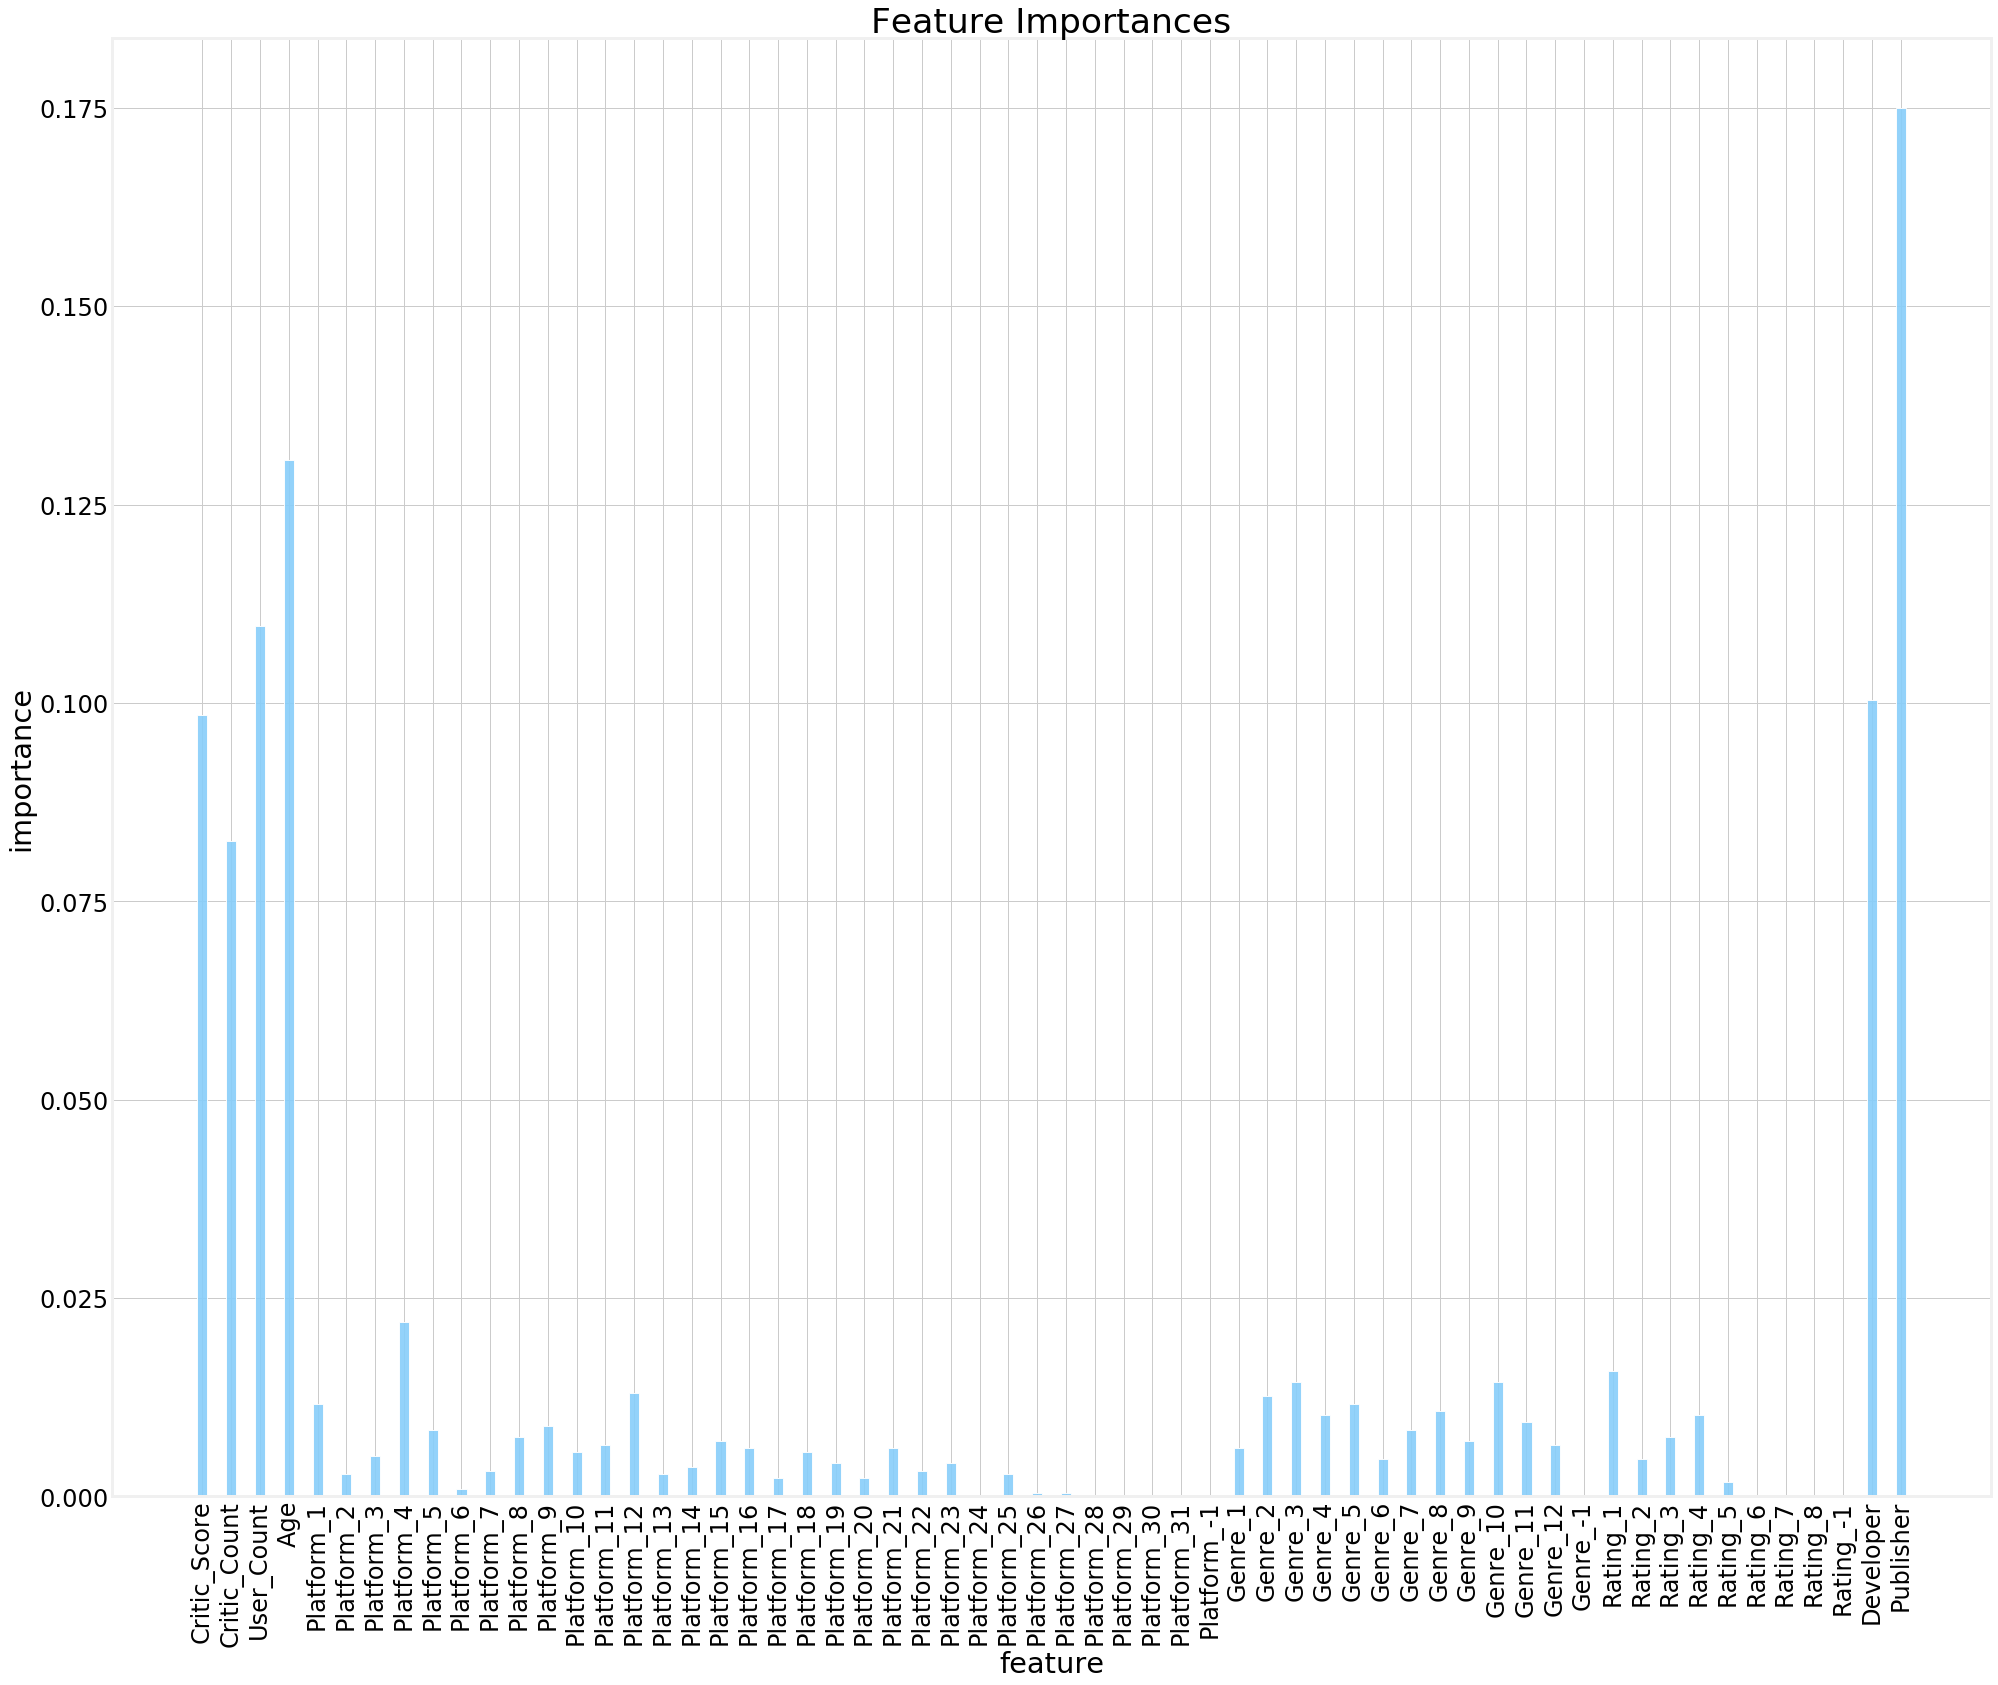

In [53]:
%%time
xgb3 = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 1.1,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
modelfit(xgb3, features_train, features_test, target_train, target_test)

The model is much better than the last. And you can see developers and publishers are very important...

In [52]:
%matplotlib inline
plt.style.use("fivethirtyeight")

# Set default font size and facecolor
plt.rcParams["font.size"] = 24
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
figsize(30, 25)

In [55]:
pred_alg=modelfit_2(xgb3, features_train, features_test, target_train, target_test)

 Score (Train): 0.030880
Score (Test): 0.037256


In [58]:
basic_final_pred = pred_alg.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))

Final model performance on the test set: MAE = 0.1377.


It has nan valude. So it is not suitable for RandomForestRegressor. lets adjust its parameters.

In [66]:
param_test1 = {
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 1.1,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(features_train,target_train)
means = gsearch1.cv_results_['mean_test_score']
params = gsearch1.cv_results_['params']
gsearch1.best_params_

{'max_depth': 9, 'min_child_weight': 5}

In [67]:
param_test1 = {
    'max_depth':[7,8,9,10],
    'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 1.1,
                    max_depth= 5,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(features_train,target_train)
means = gsearch1.cv_results_['mean_test_score']
params = gsearch1.cv_results_['params']
gsearch1.best_params_

{'max_depth': 10, 'min_child_weight': 5}

In [69]:
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
# to prevent overfiting, we still use 9 as max_depth
gsearch2 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.1,
                    min_child_weight= 5,
                    max_depth= 9,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                    param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(features_train,target_train)
gsearch2.best_params_

{'gamma': 0.0}

In [71]:
param_test3 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.0,
                    min_child_weight= 5,
                    max_depth= 9,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(features_train,target_train)
print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'colsample_bytree': 0.6, 'subsample': 0.9}
-0.03550041838432001


In [76]:
param_test4 = {
    'n_estimators':[140, 100, 80, 200],
    'learning_rate':[1e-4, 1e-3, 1e-5, 1e-2, 0.1]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.0,
                    min_child_weight= 5,
                    max_depth= 9,
                    subsample= 0.9,
                    colsample_bytree= 0.6,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    reg_alpha=0.05,                           
                    seed=27),
                       param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(features_train,target_train)
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'learning_rate': 0.1, 'n_estimators': 140}
-0.03556199827541681


In [77]:
param_test5 = {
    'reg_alpha':[1e-4, 1e-6, 1e-3, 1e-5, 1e-2, 0.1, 1, 10]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.0,
                    min_child_weight= 5,
                    max_depth= 9,
                    subsample= 0.9,
                    colsample_bytree= 0.6,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=140,
                    nthread=4,
                    scale_pos_weight=1,
                    reg_alpha=0.05,                           
                    seed=27),
                       param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch5.fit(features_train,target_train)
print(gsearch5.best_params_)
print(gsearch5.best_score_)

{'reg_alpha': 1}
-0.035224010355488555


 Score (Train): 0.022415
Score (Test): 0.035610


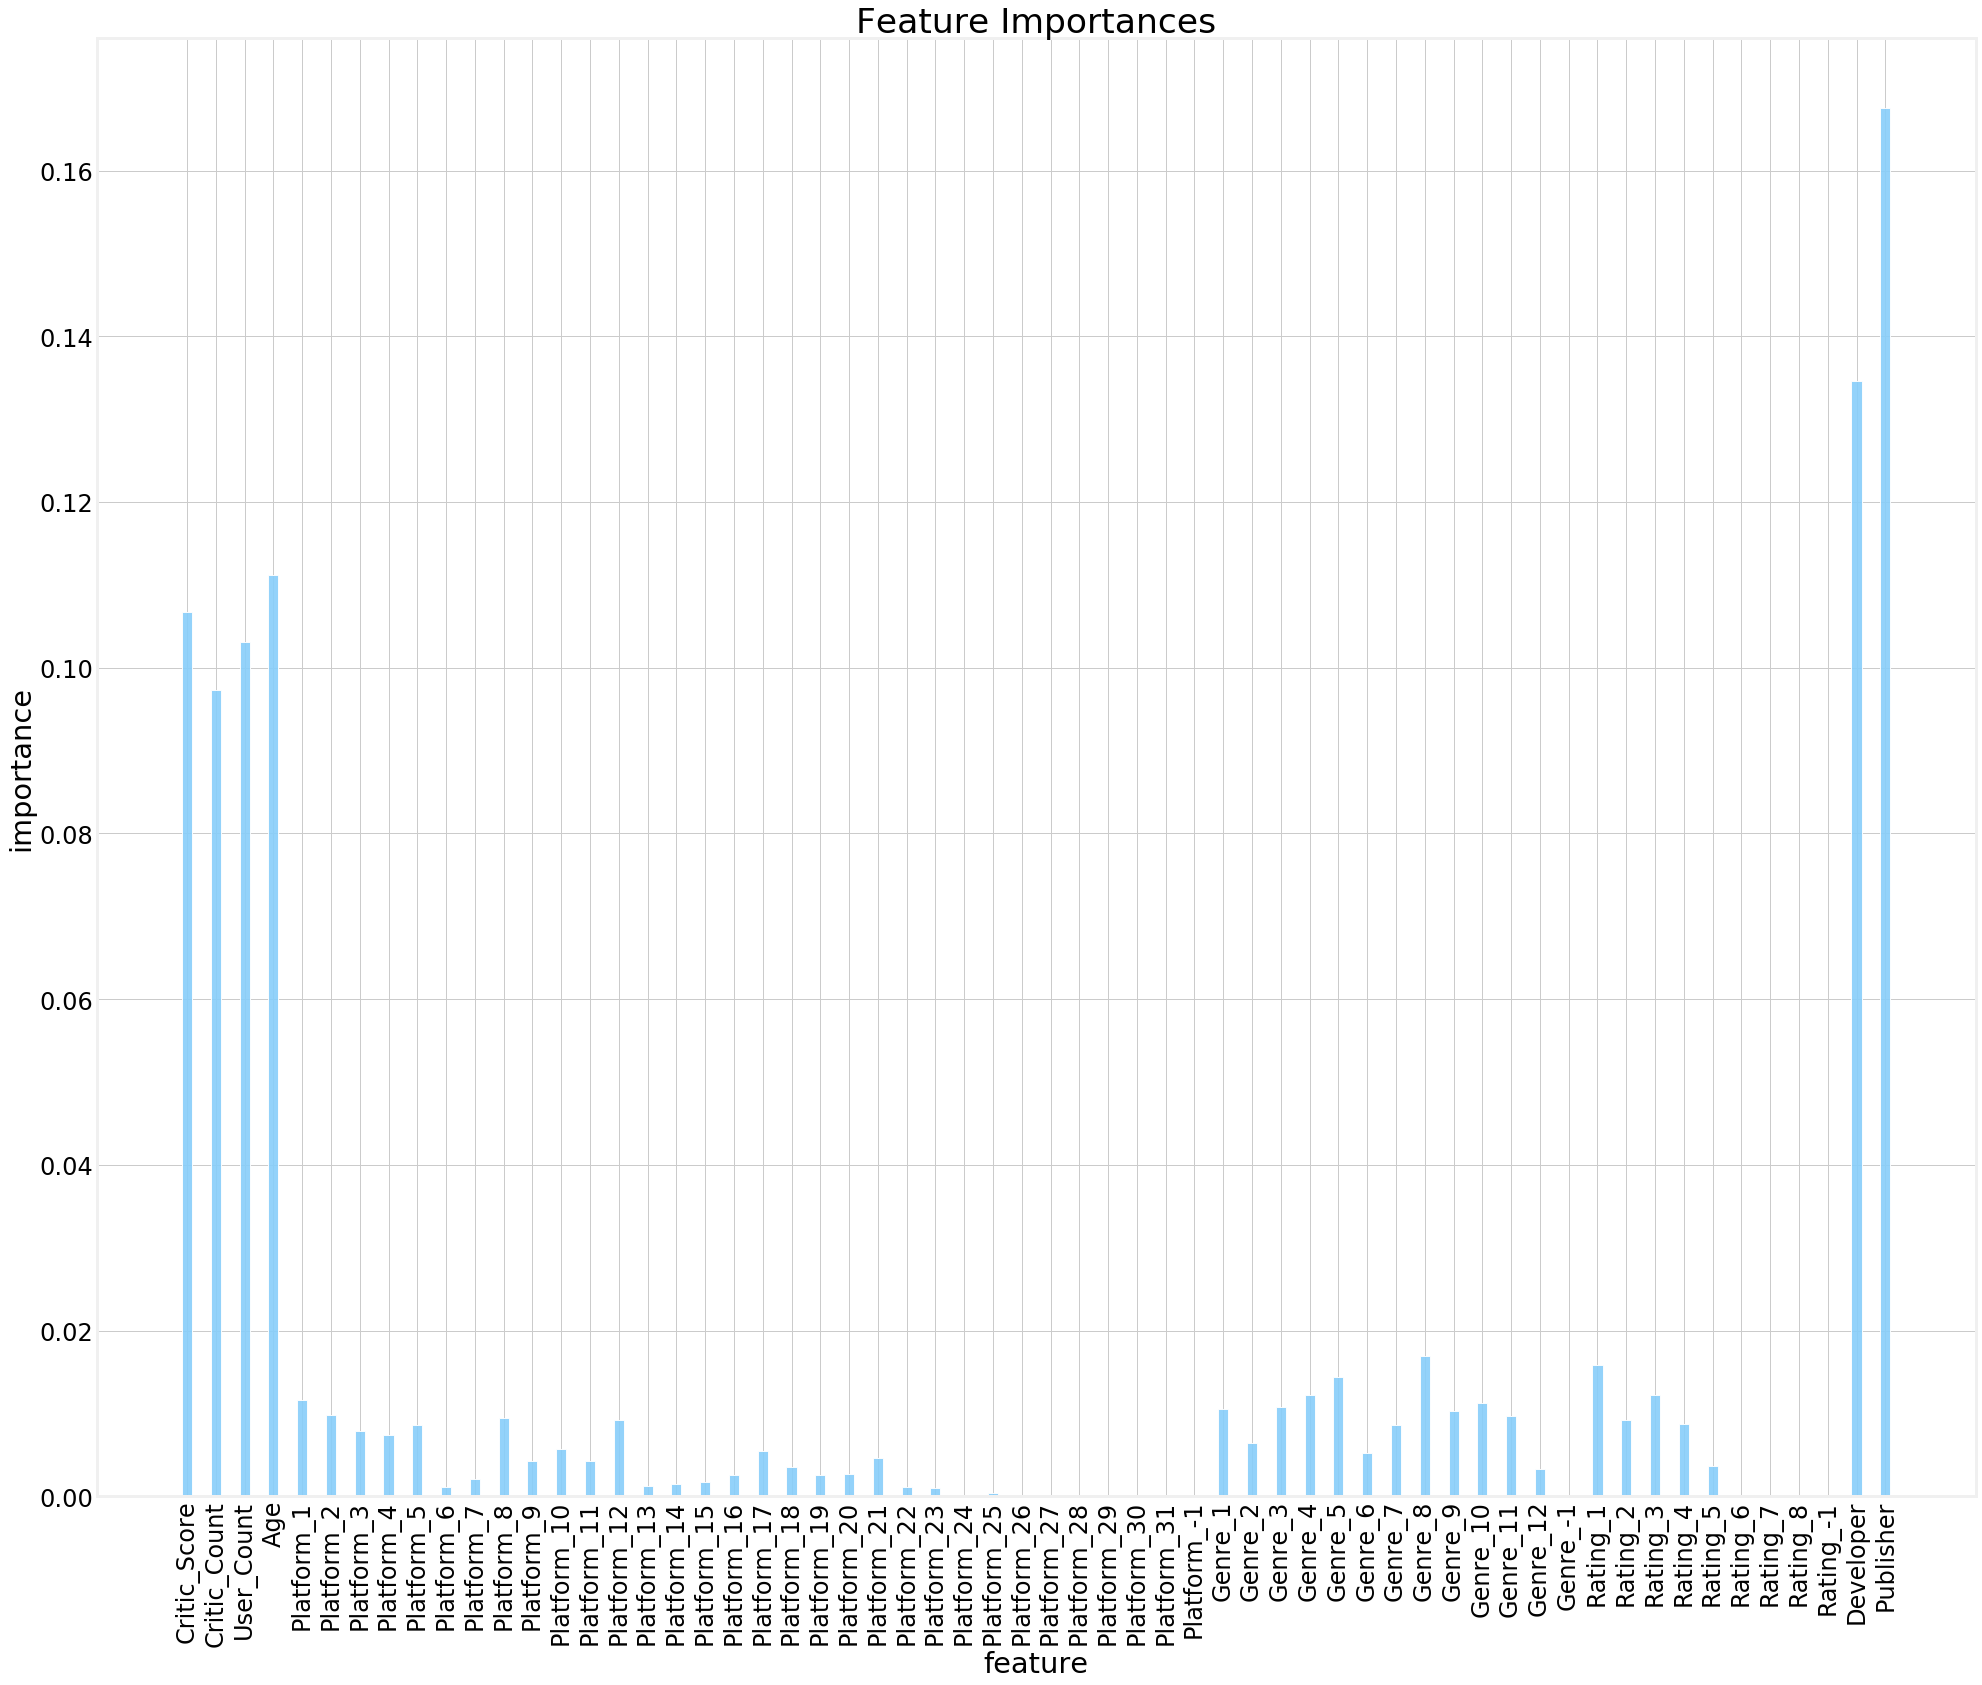

In [78]:
xgb3 = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.0,
                    min_child_weight= 5,
                    max_depth= 9,
                    subsample= 0.9,
                    colsample_bytree= 0.6,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=140,
                    nthread=4,
                    scale_pos_weight=1,
                    reg_alpha=1,                           
                    seed=27)
modelfit(xgb3, features_train, features_test, target_train, target_test)

In [80]:
pred_alg=modelfit_2(xgb3, features_train, features_test, target_train, target_test)

 Score (Train): 0.022415
Score (Test): 0.035610


In [81]:
basic_final_pred = pred_alg.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))

Final model performance on the test set: MAE = 0.1319.


Okay... It didnt seem to change much ,which means the model fits our feature data. It is better than all previous models.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


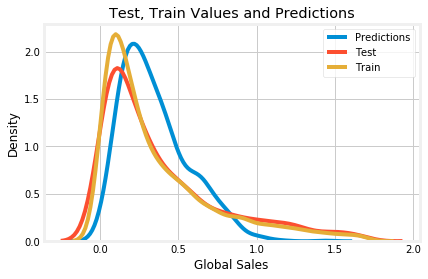

In [48]:
sns.kdeplot(basic_final_pred, label = "Predictions")
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

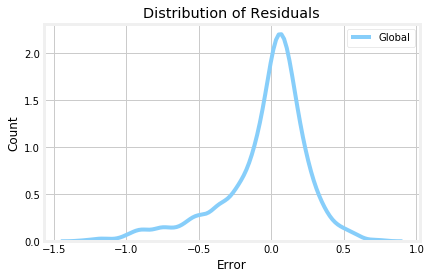

In [49]:
basic_residuals = basic_final_pred - target_test

sns.kdeplot(basic_residuals, color = "lightskyblue")
plt.xlabel("Error"); plt.ylabel("Count")
plt.title("Distribution of Residuals");

# Another model analysis
Using Decision tree

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

Data Acquisition


In [2]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
data = pd.read_csv('data\\Video_Games_Sales.csv')

prediction depends on the year,age,platform,publisher and developer

In [3]:
cols = ['Year_of_Release','Platform','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
data = data[cols]

Clear the Nan data which is not useful for prediction

In [4]:
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
# data["Year"].head(11)
data["Year"] = data["Year"].apply(int)
data["Age"] = 2019 - data["Year"]
data = data[data["Age"] > 0]

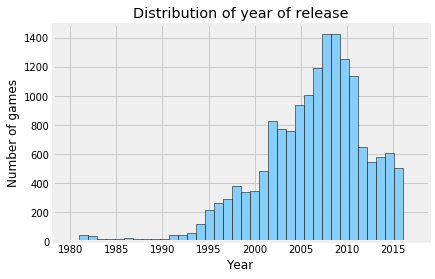

In [5]:
num_years = data["Year"].max() - data["Year"].min() + 1
plt.hist(data["Year"], bins=num_years, color="lightskyblue", edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year")
plt.ylabel("Number of games");

remove user count outlier(too small or too large are not normal)

Identifying Anomalies

In [6]:
print('The shape of our data is:', data.shape)

The shape of our data is: (16445, 9)


In [7]:
data.describe(include="all")

,Year,Platform,Genre,NA,EU,JP,Other,Global,Age
count,16445.000000,16445,16445,16445.000000,16445.000000,16445.000000,16445.000000,16445.000000,16445.000000
unique,NaN,31,12,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,PS2,Action,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2127,3308,NaN,NaN,NaN,NaN,NaN,NaN
mean,2006.487929,NaN,NaN,0.263996,0.145922,0.078479,0.047591,0.536243,12.512071
std,5.876997,NaN,NaN,0.818356,0.506702,0.311092,0.188000,1.558592,5.876997
min,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,2.000000
25%,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,9.000000
50%,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,12.000000
75%,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,16.000000


Plot them

In [8]:
data.sort_values('Year', inplace = True)

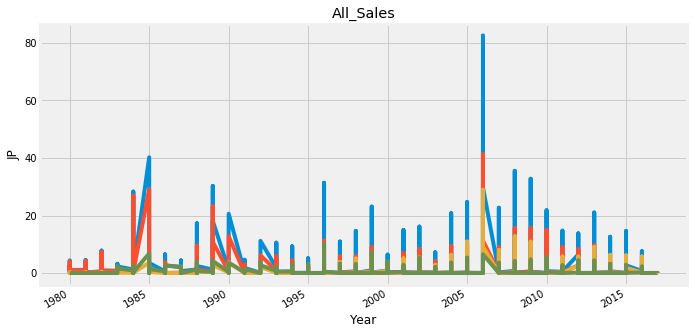

In [9]:
# Set up the plotting layout
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
fig.autofmt_xdate()

dates = data["Year"]

# global_sales
ax1.plot(dates, data['Global'])
ax1.set_xlabel(''); ax1.set_ylabel('Global'); ax1.set_title('Global_Sales')

# NA_sales
ax1.plot(dates, data['NA'])
ax1.set_xlabel(''); ax1.set_ylabel('NA'); ax1.set_title('NA_Sales')

# EU_sales
ax1.plot(dates, data['EU'])
ax1.set_xlabel(''); ax1.set_ylabel('EU'); ax1.set_title('EU_Sales')

# JP_sales
ax1.plot(dates, data['JP'])
ax1.set_xlabel('Year'); ax1.set_ylabel('JP'); ax1.set_title('All_Sales')

plt.tight_layout(pad=2)

 Data Preparation
Using numpy convert data to Arrays

one-hot: Genre/Platform/Developer

In [10]:
data = pd.get_dummies(data)

In [11]:
data.head(5)

,Year,NA,EU,JP,Other,Global,Age,Platform_2600,Platform_3DO,Platform_3DS,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
546,1980,2.56,0.17,0.0,0.03,2.76,39,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2650,1980,0.72,0.04,0.0,0.01,0.77,39,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6301,1980,0.25,0.02,0.0,0.00,0.27,39,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1764,1980,1.07,0.07,0.0,0.01,1.15,39,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4019,1980,0.46,0.03,0.0,0.01,0.49,39,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Now we have genre one-hot data

In [12]:
# from sklearn.decomposition import PCA 
# pca = PCA(n_components=10, copy=True, whiten=False)  
# data=pca.fit_transform(data) 

In [13]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict: the global sales,and sales in some specific regieons
global_sales = np.array(data['Global'])
na = np.array(data['NA'])
eu = np.array(data['EU'])
jp = np.array(data['JP'])
other = np.array(data['Other'])
years = np.array(data["Year"])

# Remove the globals from the features, so we have one table for independent variables to predict the actual sales
# (axis 1 refers to columns)
pred_list = ['Global','NA','EU','JP','Other']
data = data.drop(pred_list, axis = 1)

# Saving columns names for later use
data_list = list(data.columns)

# Convert to numpy array
data = np.array(data)

Scikit-learn split the data to training and testing

In [14]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data, train_sales, test_sales = train_test_split(data, global_sales, test_size = 0.25,
                                                                           random_state = 42)

In [15]:
print('Training Features Shape:', train_data.shape)
print('Training Labels Shape:', train_sales.shape)
print('Testing Features Shape:', test_data.shape)
print('Testing Labels Shape:', test_sales.shape)

Training Features Shape: (12333, 45)
Training Labels Shape: (12333,)
Testing Features Shape: (4112, 45)
Testing Labels Shape: (4112,)


 Establish Baseline
Actually we don't have the historcal data to be used as our baseline

Train Model

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

# Train the model on training data
rf.fit(train_data, train_sales);

Make Predictions on Test Data

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_data)

# Calculate the absolute errors
errors = abs(predictions - test_sales)

# Print out the mean absolute error (mae)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [18]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

import os
# you may have to modify the line below for the MAC. Essentially find the path for the `dot` executable, and add it 
# to your PATH environment variable:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = data_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

In [19]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 30


In [20]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=100, max_depth = 3, random_state=42)
rf_small.fit(train_data, train_sales)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = data_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

 Variable Importances
As we can see from above, the most important feature should be age & platform

In [21]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
data_importances = [(data, round(importance, 2)) for data, importance in zip(data_list, importances)]

# Sort the feature importances by most important first
data_importances = sorted(data_importances, key = lambda x: x[1], reverse = True)

Plot the importance:

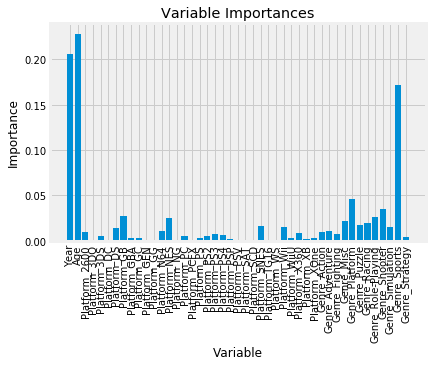

In [22]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, data_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [23]:
pred = data[-2:-1]
# pred=pca.transform(pred_features)
rf.fit(train_data, train_sales);
prediction = rf.predict(pred)
print(prediction)

[0.41417581]


Turns out to be normal

 Predictions and Actual Values
Year and Age are the same thing, so we use sports genre and age as the most important features of all

In [24]:
print(len(years))
print(len(global_sales))

16445
16445


In [25]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'year': years, 'Global': global_sales})

# Dates of predictions
test_years = test_data[:,data_list.index('Year')]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'year': test_years, 'prediction': predictions}) 

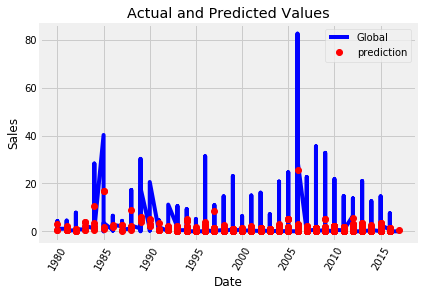

In [26]:
# Plot the actual values
plt.plot(true_data['year'], true_data['Global'], 'b-', label = 'Global')

# Plot the predicted values
plt.plot(predictions_data['year'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Actual and Predicted Values');

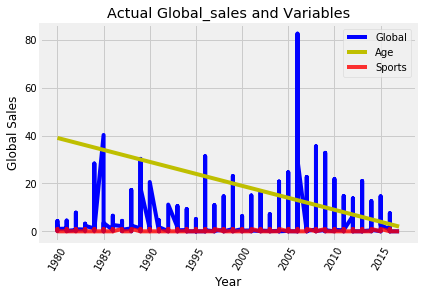

In [27]:
# Make the data accessible for plotting
true_data['Age'] = data[:, data_list.index('Age')]
true_data['Genre_Sports'] = data[:, data_list.index('Genre_Sports')]

# Plot all the data as lines
plt.plot(true_data['year'], true_data['Global'], 'b-', label  = 'Global', alpha = 1.0)
plt.plot(true_data['year'], true_data['Age'], 'y-', label  = 'Age', alpha = 1.0)
plt.plot(true_data['year'], true_data['Genre_Sports'], 'r-', label = 'Sports', alpha = 0.8)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Year'); plt.ylabel('Global Sales'); plt.title('Actual Global_sales and Variables');